In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modulesimport matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import math
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import matplotlib.cm as cm
%matplotlib inline

In [2]:
#Importing New York airbnb data
data=pd.read_csv(r"E:\Machine Learning\new-york-city-airbnb-open-data\AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


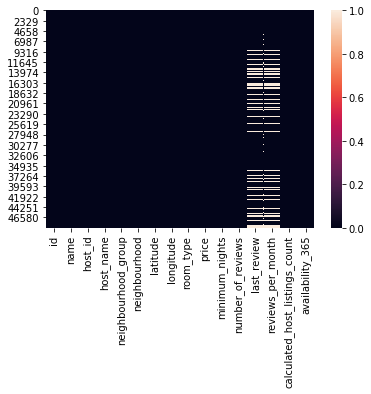

In [3]:
sns.heatmap(data.isnull()) # to check the missing data

In [4]:
data.corr() #finds the correlation

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [5]:
# filling the mmissing data with mean or mode
data['name']=data['name'].fillna(data['name'].mode()[0])
data['host_name']=data['host_name'].fillna(data['host_name'].mode()[0])
data.drop(['last_review'], axis=1, inplace=True)
data.drop(['reviews_per_month'], axis=1, inplace=True)

In [6]:
data.isnull().sum() # checking if any missing data left

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
data=data[data['price']<200] #choosing price less than 200 dollars

In [8]:
data['room_type'].value_counts()

Private room       21443
Entire home/apt    16557
Shared room         1110
Name: room_type, dtype: int64

In [9]:
data['neighbourhood_group'].value_counts()

Brooklyn         17571
Manhattan        14905
Queens            5255
Bronx             1037
Staten Island      342
Name: neighbourhood_group, dtype: int64

In [10]:
data['neighbourhood'].value_counts()

Bedford-Stuyvesant            3438
Williamsburg                  3128
Harlem                        2374
Bushwick                      2345
Crown Heights                 1406
Upper West Side               1379
East Village                  1326
Upper East Side               1315
Hell's Kitchen                1255
East Harlem                    977
Greenpoint                     948
Washington Heights             852
Astoria                        833
Midtown                        709
Lower East Side                668
Flatbush                       596
Chelsea                        573
Prospect-Lefferts Gardens      495
East Flatbush                  470
Long Island City               468
Clinton Hill                   462
Ridgewood                      406
Flushing                       398
Fort Greene                    389
Park Slope                     376
Financial District             357
Sunset Park                    357
West Village                   353
Sunnyside           

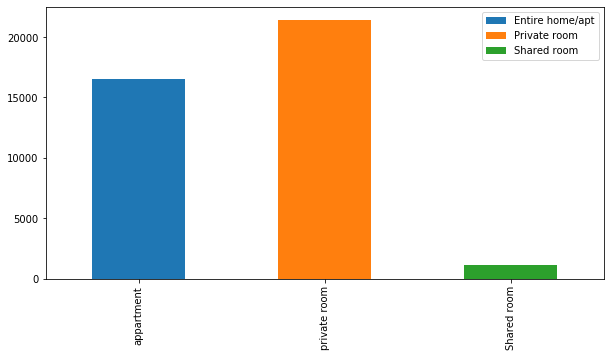

In [11]:
# Visualising type of houses in available
app=data[data['room_type']=='Entire home/apt']['room_type'].value_counts()
prv=data[data[['room_type']]=='Private room']['room_type'].value_counts()
shr=data[data[['room_type']]=='Shared room']['room_type'].value_counts()
df=pd.DataFrame([app,prv,shr])
df.index=['appartment','private room','Shared room']
df.plot(kind='bar',stacked=True, figsize=(10,5))

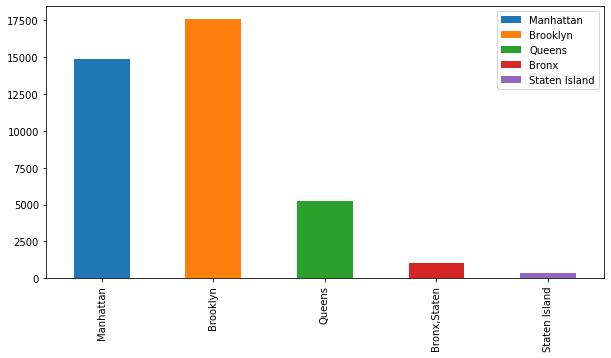

In [12]:
#Visualising available houses in diffrent boroughs
mahtn=data[data['neighbourhood_group']=='Manhattan']['neighbourhood_group'].value_counts()
brkly=data[data[['neighbourhood_group']]=='Brooklyn']['neighbourhood_group'].value_counts()
qun=data[data[['neighbourhood_group']]=='Queens']['neighbourhood_group'].value_counts()
brnx=data[data[['neighbourhood_group']]=='Bronx']['neighbourhood_group'].value_counts()
stild=data[data[['neighbourhood_group']]=='Staten Island']['neighbourhood_group'].value_counts()
df=pd.DataFrame([mahtn,brkly,qun,brnx,stild])
df.index=['Manhattan','Brooklyn','Queens','Bronx,Staten','Staten Island']
df.plot(kind='bar',stacked=True, figsize=(10,5))

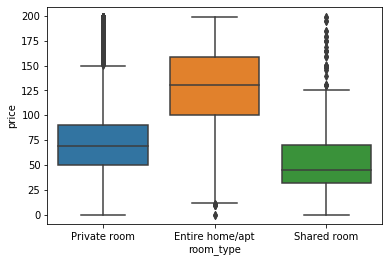

In [13]:
sns.boxplot(x='room_type',y='price',data=data) # visualising price of different types of room

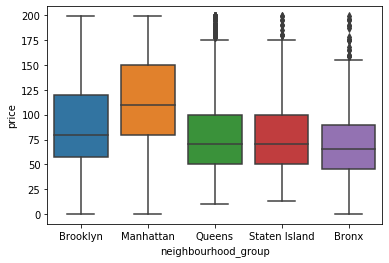

In [14]:
sns.boxplot(x='neighbourhood_group',y='price',data=data) #visuslising price of houses in different boroughs of NY

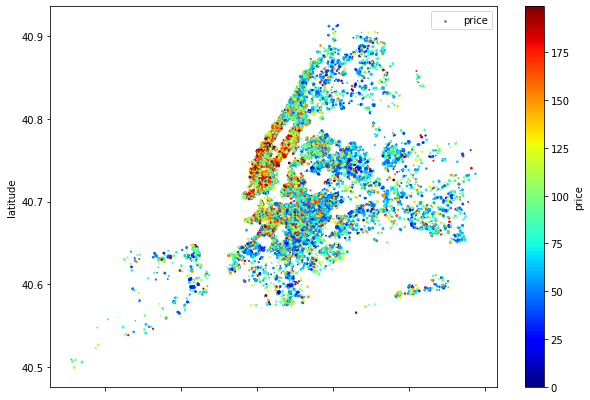

In [15]:
#visualising price distribution of houses on latitude and longitude
data.plot(kind="scatter", x="longitude", y="latitude",s=data['availability_365']/100,
    c="price",label='price', cmap=plt.get_cmap("jet"),colorbar=True,
 alpha=1, figsize=(10,7))
plt.legend()
plt.show()


In [16]:
# selecting the sample available house
df_av=data.loc[[2,3],:]
df_av

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194


In [17]:
locations = df_av[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)


2

In [18]:
locationlist

[[40.809020000000004, -73.9419], [40.685140000000004, -73.95976]]

In [19]:
#visualising the available houses on map
map_cluster1 = folium.Map(location=[40.80902,-73.94190], zoom_start=10)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map_cluster1)
map_cluster1

In [1]:
CLIENT_ID = '########################' #  Foursquare ID
CLIENT_SECRET = '#############################' # Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [21]:
#taking first house to analyse 
df_1=data.loc[[2],:]
df_av1=df_1[['latitude', 'longitude']]
latti1=df_1.iloc[0]['latitude']
longi1=df_1.iloc[0]['longitude']
print('Latitude and longitude values are {}, {}.'.format(latti1,longi1))

Latitude and longitude values are 40.809020000000004, -73.9419.


In [22]:
df_1


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,1,365


In [23]:
# creating funtion that will return nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
# getting nearby places in a variable
city_venues = getNearbyVenues(names=df_1['name'],
                                   latitudes=df_1['latitude'],
                                   longitudes=df_1['longitude'],radius=1000)



THE VILLAGE OF HARLEM....NEW YORK !


In [25]:
print(city_venues.shape)
city_venues

(100, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Jacob Restaurant,40.810219,-73.943755,Southern / Soul Food Restaurant
1,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,babbalucci,40.808875,-73.944796,Pizza Place
2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Yoga Studio,40.807077,-73.944010,Yoga Studio
3,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Lenox Coffee,40.810161,-73.943247,Coffee Shop
4,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Pompette,40.811440,-73.942332,Wine Shop
5,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Red Rooster,40.808027,-73.944821,Southern / Soul Food Restaurant
6,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,National Black Theatre,40.806826,-73.941954,Theater
7,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Sushi Inoue,40.810342,-73.943723,Sushi Restaurant
8,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Ginny's Supper Club,40.808250,-73.945151,Comfort Food Restaurant
9,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Ale House,40.809334,-73.944863,Bar


In [26]:
m=city_venues['Venue Category'].str.split().str[-1]
m

0       Restaurant
1            Place
2           Studio
3             Shop
4             Shop
5       Restaurant
6          Theater
7       Restaurant
8       Restaurant
9              Bar
10            Café
11      Restaurant
12            Club
13      Restaurant
14           Store
15          Museum
16           Joint
17           Store
18          Lounge
19      Restaurant
20            Park
21           Place
22           Store
23      Restaurant
24         Library
25          Market
26           Joint
27      Restaurant
28       Bookstore
29      Restaurant
30            Shop
31      Restaurant
32      Restaurant
33         Theater
34    Amphitheater
35        Boutique
36           Truck
37           Venue
38             Bar
39            Shop
40      Restaurant
41            Shop
42      Restaurant
43      Restaurant
44      Restaurant
45      Restaurant
46      Restaurant
47             Bar
48            Club
49             Bar
50          Center
51        Creperie
52          

In [27]:
X = pd.get_dummies(m, prefix="", prefix_sep="")
X

,Amphitheater,Bakery,Bar,Bodega,Bookstore,Boutique,Café,Center,Club,Creperie,Dojo,Gallery,Gym,Joint,Library,Lookout,Lounge,Market,Museum,Park,Place,Playground,Restaurant,Run,Shop,Store,Studio,Theater,Truck,Venue
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# used KNN model to classify the venues in 15 different categories
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
kmeans.labels_

array([ 1, 10, 11,  5,  5,  1,  7,  1,  1,  2,  3,  1,  4,  1,  9,  0,  6,
        9,  0,  1, 14, 10,  9,  1,  0,  0,  6,  1,  0,  1,  5,  1,  1,  7,
        0, 12,  0,  0,  2,  5,  1,  5,  1,  1,  1,  1,  1,  2,  4,  2, 13,
        0,  0,  3,  1,  5,  1,  1,  3,  2,  7,  6, 11, 13,  0,  4,  2,  8,
        1,  8,  8,  1, 11,  1,  0,  1,  5,  1,  0,  9,  5,  5,  5,  0,  1,
       10,  1,  3,  1, 14,  9, 13,  5,  8,  1,  2,  0,  0,  1, 12])

In [29]:
l=kmeans.labels_
l

array([ 1, 10, 11,  5,  5,  1,  7,  1,  1,  2,  3,  1,  4,  1,  9,  0,  6,
        9,  0,  1, 14, 10,  9,  1,  0,  0,  6,  1,  0,  1,  5,  1,  1,  7,
        0, 12,  0,  0,  2,  5,  1,  5,  1,  1,  1,  1,  1,  2,  4,  2, 13,
        0,  0,  3,  1,  5,  1,  1,  3,  2,  7,  6, 11, 13,  0,  4,  2,  8,
        1,  8,  8,  1, 11,  1,  0,  1,  5,  1,  0,  9,  5,  5,  5,  0,  1,
       10,  1,  3,  1, 14,  9, 13,  5,  8,  1,  2,  0,  0,  1, 12])

In [30]:
df=pd.DataFrame(l)

In [31]:
df1=pd.concat([m,df],axis=1)
df1.rename(columns={0: "a",'Venue Category':'venue'}, inplace=True)
df1

,venue,a
0,Restaurant,1
1,Place,10
2,Studio,11
3,Shop,5
4,Shop,5
5,Restaurant,1
6,Theater,7
7,Restaurant,1
8,Restaurant,1
9,Bar,2


In [32]:
res=df=pd.concat([city_venues,df1],axis=1).reset_index()

In [33]:
res

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,a
0,0,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Jacob Restaurant,40.810219,-73.943755,Southern / Soul Food Restaurant,Restaurant,1
1,1,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,babbalucci,40.808875,-73.944796,Pizza Place,Place,10
2,2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Yoga Studio,40.807077,-73.944010,Yoga Studio,Studio,11
3,3,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Lenox Coffee,40.810161,-73.943247,Coffee Shop,Shop,5
4,4,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Pompette,40.811440,-73.942332,Wine Shop,Shop,5
5,5,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Red Rooster,40.808027,-73.944821,Southern / Soul Food Restaurant,Restaurant,1
6,6,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,National Black Theatre,40.806826,-73.941954,Theater,Theater,7
7,7,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Sushi Inoue,40.810342,-73.943723,Sushi Restaurant,Restaurant,1
8,8,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Ginny's Supper Club,40.808250,-73.945151,Comfort Food Restaurant,Restaurant,1
9,9,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Ale House,40.809334,-73.944863,Bar,Bar,2


In [34]:
newdf=res[res['a']>0]
newdf=newdf.reset_index()
newdf

,level_0,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,a
0,0,0,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Jacob Restaurant,40.810219,-73.943755,Southern / Soul Food Restaurant,Restaurant,1
1,1,1,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,babbalucci,40.808875,-73.944796,Pizza Place,Place,10
2,2,2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Yoga Studio,40.807077,-73.944010,Yoga Studio,Studio,11
3,3,3,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Lenox Coffee,40.810161,-73.943247,Coffee Shop,Shop,5
4,4,4,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Pompette,40.811440,-73.942332,Wine Shop,Shop,5
5,5,5,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Red Rooster,40.808027,-73.944821,Southern / Soul Food Restaurant,Restaurant,1
6,6,6,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,National Black Theatre,40.806826,-73.941954,Theater,Theater,7
7,7,7,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Sushi Inoue,40.810342,-73.943723,Sushi Restaurant,Restaurant,1
8,8,8,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Ginny's Supper Club,40.808250,-73.945151,Comfort Food Restaurant,Restaurant,1
9,9,9,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Ale House,40.809334,-73.944863,Bar,Bar,2


In [35]:
newdf0=res[res['a']==0]
newdf0=newdf0.reset_index()
newdf0

,level_0,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,a
0,15,15,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Studio Museum in Harlem,40.808649,-73.947471,Art Museum,Museum,0
1,18,18,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Cove Lounge,40.808718,-73.945196,Lounge,Lounge,0
2,24,24,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,NYPL Schomburg Center for Research in Black Cu...,40.814575,-73.940928,Library,Library,0
3,25,25,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Jahlookova Natural Organic Health Mart,40.806213,-73.940428,Market,Market,0
4,28,28,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Revolution Books,40.812080,-73.942375,Bookstore,Bookstore,0
5,34,34,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Richard Rodgers Amphitheatre,40.804823,-73.944364,Amphitheater,Amphitheater,0
6,36,36,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Seafood Soul,40.810272,-73.947477,Food Truck,Truck,0
7,37,37,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Shrine World Music Venue,40.814403,-73.944242,Music Venue,Venue,0
8,51,51,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Crêpe Master,40.806536,-73.941795,Creperie,Creperie,0
9,52,52,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Sword Class NYC,40.805772,-73.940839,Martial Arts Dojo,Dojo,0


In [36]:
loca = df_av1[['latitude', 'longitude']]
locationl = loca.values.tolist()
locationl

[[40.809020000000004, -73.9419]]

In [37]:
map_clusters2 = folium.Map( location=[40.80902,-73.94190], zoom_start=16)
for point in range(len(locationl)):
    folium.Marker(locationl[point]).add_to(map_clusters2)
map_clusters2

In [38]:
#Displaying venues on map
kclusters=16
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newdf['Venue Latitude'], newdf['Venue Longitude'], newdf['venue'], newdf['a']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

In [39]:
#making list of the venues in the map
num_top_venues = 7
for hood in newdf['venue'].unique():
    print("----"+hood+"----")
    temp = newdf[['Venue']][newdf['venue'] == hood]
    temp.columns = ['Venue']
    temp = temp.iloc[1:]
    print(temp.reset_index(drop=True).head(num_top_venues))
    print('\n')

----Restaurant----
                         Venue
0                  Red Rooster
1                  Sushi Inoue
2          Ginny's Supper Club
3                   Uptown Veg
4          Sylvia's Restaurant
5                Corner Social
6  Tropical Grill & Restaurant


----Place----
                         Venue
0  Sottocasa Pizzeria - Harlem
1                   Pizza Stop


----Studio----
          Venue
0  Harlem Cycle
1    Unity Yoga


----Shop----
                       Venue
0                   Pompette
1          Serengeti Kitchen
2  Carol's Daughter Flagship
3                       AT&T
4        Sugar Hill Creamery
5             House of Hoops
6                 Monkey Cup


----Theater----
                   Venue
0         Apollo Theater
1  Oberia Dempsey Center


----Bar----
              Venue
0       Harlem Hops
1        Rejuvenate
2          Barawine
3   Gin Fizz Harlem
4        Sugar Monk
5  Lorraine's Place


----Café----
             Venue
0  Chaiwali Harlem
1       ACP 

In [64]:
w=df_av1['latitude']
e=df_av1['longitude']
t=[]
for lati, long in zip(newdf['Venue Latitude'], newdf['Venue Longitude']):
    dist=math.sqrt(abs(long-e)+abs(lati-w))*11
    t.append(dist)


In [65]:
p=pd.DataFrame(t)

In [66]:
dfnw=pd.concat([newdf,p],axis=1)
dfnw.rename(columns={0:"dist"}, inplace=True)
dfnw

,level_0,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,a,dist
0,0,0,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Jacob Restaurant,40.810219,-73.943755,Southern / Soul Food Restaurant,Restaurant,1,0.607849
1,1,1,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,babbalucci,40.808875,-73.944796,Pizza Place,Place,10,0.606616
2,2,2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Yoga Studio,40.807077,-73.944010,Yoga Studio,Studio,11,0.700270
3,3,3,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Lenox Coffee,40.810161,-73.943247,Coffee Shop,Shop,5,0.548746
4,4,4,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Pompette,40.811440,-73.942332,Wine Shop,Shop,5,0.587524
5,5,5,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Red Rooster,40.808027,-73.944821,Southern / Soul Food Restaurant,Restaurant,1,0.688160
6,6,6,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,National Black Theatre,40.806826,-73.941954,Theater,Theater,7,0.521518
7,7,7,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Sushi Inoue,40.810342,-73.943723,Sushi Restaurant,Restaurant,1,0.616855
8,8,8,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Ginny's Supper Club,40.808250,-73.945151,Comfort Food Restaurant,Restaurant,1,0.697460
9,9,9,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Ale House,40.809334,-73.944863,Bar,Bar,2,0.629696


In [67]:
df=[0]*kclusters
for i in range(kclusters):
    df[i]=dfnw[dfnw['a']==i]
    pd.DataFrame(df[i])
df

[Empty DataFrame
 Columns: [level_0, index, Neighborhood, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category, venue, a, dist]
 Index: [],     level_0  index                         Neighborhood  \
 0         0      0  THE VILLAGE OF HARLEM....NEW YORK !   
 5         5      5  THE VILLAGE OF HARLEM....NEW YORK !   
 7         7      7  THE VILLAGE OF HARLEM....NEW YORK !   
 8         8      8  THE VILLAGE OF HARLEM....NEW YORK !   
 11       11     11  THE VILLAGE OF HARLEM....NEW YORK !   
 13       13     13  THE VILLAGE OF HARLEM....NEW YORK !   
 17       19     19  THE VILLAGE OF HARLEM....NEW YORK !   
 21       23     23  THE VILLAGE OF HARLEM....NEW YORK !   
 23       27     27  THE VILLAGE OF HARLEM....NEW YORK !   
 24       29     29  THE VILLAGE OF HARLEM....NEW YORK !   
 26       31     31  THE VILLAGE OF HARLEM....NEW YORK !   
 27       32     32  THE VILLAGE OF HARLEM....NEW YORK !   
 32       40     40  THE VILLAGE

In [68]:

dj=[0]*kclusters
dm=[]
for j in range(kclusters):
    dj[j]=df[j][(df[j]['dist']==df[j]['dist'].min())]
    dm.append(dj)
dj


[Empty DataFrame
 Columns: [level_0, index, Neighborhood, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category, venue, a, dist]
 Index: [],     level_0  index                         Neighborhood  \
 23       27     27  THE VILLAGE OF HARLEM....NEW YORK !   
 
     Neighborhood Latitude  Neighborhood Longitude Venue  Venue Latitude  \
 23               40.80902                -73.9419  Yuzu       40.809492   
 
     Venue Longitude    Venue Category       venue  a      dist  
 23       -73.944247  Sushi Restaurant  Restaurant  1  0.584053  ,    level_0  index                         Neighborhood  Neighborhood Latitude  \
 9        9      9  THE VILLAGE OF HARLEM....NEW YORK !               40.80902   
 
    Neighborhood Longitude             Venue  Venue Latitude  Venue Longitude  \
 9                -73.9419  Harlem Ale House       40.809334       -73.944863   
 
   Venue Category venue  a      dist  
 9            Bar   Bar  2  0.62969

In [69]:
l=pd.concat([pd.DataFrame(dj[i]) for i in range(kclusters)],
          ignore_index=True)
l

,level_0,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,a,dist
0,27,27,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Yuzu,40.809492,-73.944247,Sushi Restaurant,Restaurant,1,0.584053
1,9,9,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Ale House,40.809334,-73.944863,Bar,Bar,2,0.629696
2,10,10,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Harlem Blues Cafe,40.810494,-73.939298,Café,Café,3,0.702287
3,48,48,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,New Amsterdam Musical Association,40.811374,-73.943746,Jazz Club,Club,4,0.712881
4,3,3,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Lenox Coffee,40.810161,-73.943247,Coffee Shop,Shop,5,0.548746
5,16,16,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Shake Shack,40.806603,-73.942397,Burger Joint,Joint,6,0.593770
6,6,6,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,National Black Theatre,40.806826,-73.941954,Theater,Theater,7,0.521518
7,70,70,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Lt Joseph P Kennedy Jr Community Center Gym,40.812608,-73.939699,Gym,Gym,8,0.836924
8,22,22,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,Wild Olive Market,40.806217,-73.941814,Grocery Store,Store,9,0.591191
9,1,1,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.9419,babbalucci,40.808875,-73.944796,Pizza Place,Place,10,0.606616


In [70]:
loca = l[['Venue Latitude', 'Venue Longitude']]
loc = loca.values.tolist()
loc

[[40.80949236048141, -73.94424679794078],
 [40.809334, -73.944863],
 [40.810494101870816, -73.93929800579912],
 [40.811374, -73.94374599999999],
 [40.81016115081859, -73.94324746240666],
 [40.806602956679846, -73.94239669863656],
 [40.806826267928656, -73.94195404104052],
 [40.81260785559189, -73.93969908127347],
 [40.80621716812029, -73.94181434324825],
 [40.80887484053778, -73.94479602674905],
 [40.80707697816692, -73.9440096915664],
 [40.806143842705076, -73.94692015066336],
 [40.81479, -73.94291],
 [40.80488312084375, -73.94433155642929]]

In [71]:
loca = df_av1[['latitude', 'longitude']]
locationl = loca.values.tolist()
locationl

[[40.809020000000004, -73.9419]]

In [72]:
m = folium.Map( location=[40.80902,-73.94190], zoom_start=16)
for point in range(len(locationl)):
    folium.Marker(locationl[point]).add_to(m)
m

In [73]:
#extraction important venues and visualise it on map
import cv2 #import cv2 to read images, that are used as icon
img = cv2.imread(r"E:\Machine Learning\restroicon.png") 
icon1 = folium.features.CustomIcon(img,icon_size=(35, 35))
img2=cv2.imread(r"E:\Machine Learning\parksign.png")
icon2 = folium.features.CustomIcon(img2,icon_size=(35, 35))
img3=cv2.imread(r"E:\Machine Learning\gymicon.png")
icon3 = folium.features.CustomIcon(img3,icon_size=(35, 35))
img4=cv2.imread(r"E:\Machine Learning\hospitalsign.jpg")
icon4 = folium.features.CustomIcon(img4,icon_size=(35, 35))
img5=cv2.imread(r"E:\Machine Learning\shop-icon.png")
icon5 = folium.features.CustomIcon(img5,icon_size=(35, 35))
for point,g in zip(range(0, len(loc)), range(0,len(l))):
    if l['venue'][g]=='Restaurant':
        folium.Marker(location=loc[point],icon=icon1).add_to(m)
    if l['venue'][g]=='Shop':
        folium.Marker(location=loc[point],icon=icon5).add_to(m)
    if l['venue'][g]=='Pharmacy':
        folium.Marker(location=loc[point],icon=icon4).add_to(m)
    if l['venue'][g]=='Gym':
        folium.Marker(location=loc[point],icon=icon3).add_to(m)
    if l['venue'][g]=='Park':
        folium.Marker(location=loc[point],icon=icon2).add_to(m)
m

In [93]:
#making the list of important venues 
print("The house name:{0} \n ".format(df_1['name'] ))
print("Rent Cost(in dollors):{0} \n".format(df_1['price']))
print("Important Places in your locality:")
num_top_venues = 5
for hood in ['Restaurant','Shop','Pharmacy','Gym','Park']:
    print("----"+hood+"----")
    temp = l[['Venue','dist']][l['venue'] == hood]
    temp.columns = ['venue','distance']
    temp['distance'] = temp['distance'].astype(float)
    temp = temp.round({'dist': 2})
    print(temp.sort_values('distance', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
        

The house name:2    THE VILLAGE OF HARLEM....NEW YORK !
Name: name, dtype: object 
 
Rent Cost(in dollors):2    150
Name: price, dtype: int64 

Important Places in your locality:
----Restaurant----
  venue  distance
0  Yuzu  0.584053


----Shop----
          venue  distance
0  Lenox Coffee  0.548746


----Pharmacy----
Empty DataFrame
Columns: [venue, distance]
Index: []


----Gym----
                                         venue  distance
0  Lt Joseph P Kennedy Jr Community Center Gym  0.836924


----Park----
                venue  distance
0  Marcus Garvey Park  0.891505




In [51]:
#doing the same process that has been done on the first house
df_2=data.loc[[3],:]
df_av2=df_2[['latitude', 'longitude']]
latti2=df_2.iloc[0]['latitude']
longi2=df_2.iloc[0]['longitude']
print('Latitude and longitude values are {}, {}.'.format(latti2,longi2))


Latitude and longitude values are 40.685140000000004, -73.95976.


In [52]:
city_venues2 = getNearbyVenues(names=df_2['name'],
                                   latitudes=df_2['latitude'],
                                   longitudes=df_2['longitude'],radius=1000)

Cozy Entire Floor of Brownstone


In [53]:
m2=city_venues2['Venue Category'].str.split().str[-1]
X2 = pd.get_dummies(m2, prefix="", prefix_sep="")
X2

,Art,Bakery,Bar,Boutique,Brewery,Café,Center,Diner,Garden,Gastropub,Gym,Joint,Market,Nightclub,Nightlife,Place,Playground,Pub,Restaurant,Service,Shop,Store,Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
kmeans2 = KMeans(n_clusters=15, random_state=0).fit(X2)
kmeans2.labels_
l2=kmeans2.labels_
l2

array([ 0,  2,  7, 13,  3,  3,  2,  3,  4,  0,  2,  0,  1,  0,  2,  1,  1,
        7,  3,  0,  5,  2, 10,  2,  1,  1,  2,  0,  4,  2,  8,  1,  1,  1,
        3,  2,  0,  2,  4,  6,  3,  0,  2,  2,  2,  5,  8,  3,  5, 12,  9,
        0,  3,  1,  1,  2,  1, 10,  2,  2,  3,  1,  2, 11,  3,  4,  7,  3,
        1,  1,  0,  0,  9,  6,  2,  1,  0,  3, 14,  1,  1,  1,  1,  3,  2,
        2,  1,  1,  0, 12,  2,  4,  3,  2,  1,  2,  2,  0,  3,  3])

In [55]:
dfa=pd.DataFrame(l2)
df2=pd.concat([m2,dfa],axis=1)
df2.rename(columns={0: "a",'Venue Category':'venue'}, inplace=True)
df2

,venue,a
0,Place,0
1,Restaurant,2
2,Bakery,7
3,Pub,13
4,Shop,3
5,Shop,3
6,Restaurant,2
7,Shop,3
8,Café,4
9,Place,0


In [56]:
res2=pd.concat([city_venues2,df2],axis=1).reset_index()
newdf2=res2[res2['a']>0]
newdf2=newdf2.reset_index()
newdf2

,level_0,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,a
0,1,1,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Locanda Vini & Olii,40.684852,-73.962929,Italian Restaurant,Restaurant,2
1,2,2,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Clementine Bakery,40.687473,-73.959748,Bakery,Bakery,7
2,3,3,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Hartley's,40.682608,-73.961360,Pub,Pub,13
3,4,4,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Mekelburg's,40.687571,-73.962370,Gourmet Shop,Shop,3
4,5,5,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Always and Forever,40.681952,-73.958425,Coffee Shop,Shop,3
5,6,6,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Peaches Shrimp & Crab,40.688153,-73.962714,Southern / Soul Food Restaurant,Restaurant,2
6,7,7,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Leon & Son Wine & Spirits,40.682764,-73.963174,Wine Shop,Shop,3
7,8,8,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Urban Vintage,40.687974,-73.962710,Café,Café,4
8,10,10,Cozy Entire Floor of Brownstone,40.68514,-73.95976,The Fly,40.681885,-73.958636,American Restaurant,Restaurant,2
9,12,12,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Dynaco,40.686660,-73.954633,Bar,Bar,1


In [57]:
loca2 = df_av2[['latitude', 'longitude']]
locationl2 = loca2.values.tolist()
locationl2

[[40.685140000000004, -73.95976]]

In [95]:
map_clusters3 = folium.Map( location=[40.685140000000004, -73.95976], zoom_start=15)
for point in range(len(locationl2)):
    folium.Marker(locationl2[point]).add_to(map_clusters3)
map_clusters3

In [96]:
# visulalised venues on a map
kclusters=16
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newdf2['Venue Latitude'], newdf2['Venue Longitude'], newdf2['venue'], newdf2['a']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters3)
       
map_clusters3

In [60]:
#printing venues as a list
num_top_venues = 7
for hood in newdf2['venue'].unique():
    print("----"+hood+"----")
    temp = newdf2[['Venue']][newdf2['venue'] == hood]
    temp.columns = ['Venue']
    temp = temp.iloc[1:]
    print(temp.reset_index(drop=True).head(num_top_venues))
    print('\n')

----Restaurant----
                   Venue
0  Peaches Shrimp & Crab
1                The Fly
2              The Finch
3                  Golda
4                 Hart's
5     Pilar Cuban Eatery
6    Joloff Restaurant 2


----Bakery----
            Venue
0  The Good Batch
1   Beny's Delice


----Pub----
Empty DataFrame
Columns: [Venue]
Index: []


----Shop----
                           Venue
0             Always and Forever
1      Leon & Son Wine & Spirits
2               The Mixtape Shop
3             Daily Press Coffee
4  Stonefruit Espresso + Kitchen
5         Playground Coffee Shop
6           Brooklyn Kolache Co.


----Café----
           Venue
0  Relationships
1  Choice Market
2  Primrose Cafe
3   Ciao, Gloria


----Bar----
                 Venue
0                Doris
1           The Holler
2            Hops Hill
3           Do or Dive
4      C'mon Everybody
5      Glorietta Baldy
6  Bar Laika by e-flux


----Store----
                         Venue
0     Metropolitan City Marke

In [75]:
w2=df_av2['latitude']
e2=df_av2['longitude']
t2=[]
for lati, long in zip(newdf2['Venue Latitude'], newdf2['Venue Longitude']):
    dist=math.sqrt(abs(long-e2)+abs(lati-w2))*11
    t2.append(dist)

p=pd.DataFrame(t2)
dfnw2=pd.concat([newdf2,p],axis=1)
dfnw2.rename(columns={0:"dist"}, inplace=True)

df2=[0]*kclusters
for i in range(kclusters):
    df2[i]=dfnw2[dfnw2['a']==i]
    pd.DataFrame(df2[i])
    
dj2=[0]*kclusters
dm2=[]
for j in range(kclusters):
    dj2[j]=df2[j][(df2[j]['dist']==df2[j]['dist'].min())]
    dm.append(dj2)


l2=pd.concat([pd.DataFrame(dj2[i]) for i in range(kclusters)],
          ignore_index=True)

loca2 = l2[['Venue Latitude', 'Venue Longitude']]
loc2 = loca2.values.tolist()

loca2 = df_av2[['latitude', 'longitude']]
locationl2 = loca2.values.tolist()
locationl2

[[40.685140000000004, -73.95976]]

In [102]:
m2 = folium.Map( location=[40.685140000000004, -73.95976], zoom_start=16)
for point in range(len(locationl2)):
    folium.Marker(locationl2[point]).add_to(m2)
m2

In [103]:
#displaying important venues of on the map
import cv2
img = cv2.imread(r"E:\Machine Learning\restroicon.png") 
icon1 = folium.features.CustomIcon(img,icon_size=(50, 50))
img2=cv2.imread(r"E:\Machine Learning\parksign.png")
icon2 = folium.features.CustomIcon(img2,icon_size=(50, 50))
img3=cv2.imread(r"E:\Machine Learning\gymicon.png")
icon3 = folium.features.CustomIcon(img3,icon_size=(50, 50))
img4=cv2.imread(r"E:\Machine Learning\hospitalsign.jpg")
icon4 = folium.features.CustomIcon(img4,icon_size=(50, 50))
img5=cv2.imread(r"E:\Machine Learning\shop-icon.png")
icon5 = folium.features.CustomIcon(img5,icon_size=(50, 50))
for point,g in zip(range(0, len(loc)), range(0,len(l))):
    if l2['venue'][g]=='Restaurant':
        folium.Marker(location=loc2[point],icon=icon1).add_to(m2)
    if l2['venue'][g]=='Shop':
        folium.Marker(location=loc2[point],icon=icon5).add_to(m2)
    if l2['venue'][g]=='Pharmacy':
        folium.Marker(location=loc2[point],icon=icon4).add_to(m2)
    if l2['venue'][g]=='Gym':
        folium.Marker(location=loc2[point],icon=icon3).add_to(m2)
    if l2['venue'][g]=='Garden':
        folium.Marker(location=loc2[point],icon=icon2).add_to(m2)
m2

In [106]:
#displaying list of important venues in a list
print("The house name:{0} \n ".format(df_2['name'] ))
print("Rent Cost(in dollors):{0} \n".format(df_2['price']))
print("Important Places in your locality:")
num_top_venues = 5
for hood in ['Restaurant','Shop','Gym','Garden']:
    print("----"+hood+"----")
    temp = l2[['Venue','dist']][l2['venue'] == hood]
    temp.columns = ['venue','distance']
    temp['distance'] = temp['distance'].astype(float)
    temp = temp.round({'dist': 2})
    print(temp.sort_values('distance', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
        

The house name:3    Cozy Entire Floor of Brownstone
Name: name, dtype: object 
 
Rent Cost(in dollors):3    89
Name: price, dtype: int64 

Important Places in your locality:
----Restaurant----
                 venue  distance
0  Locanda Vini & Olii  0.646749


----Shop----
                venue  distance
0  Always and Forever  0.739786


----Gym----
Empty DataFrame
Columns: [venue, distance]
Index: []


----Garden----
                         venue  distance
0  Jane Bailey Memorial Garden  0.685217




In [97]:
l2

,level_0,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,venue,a,dist
0,33,33,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Bar Laika by e-flux,40.687093,-73.962138,Cocktail Bar,Bar,1,0.723901
1,1,1,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Locanda Vini & Olii,40.684852,-73.962929,Italian Restaurant,Restaurant,2,0.646749
2,5,5,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Always and Forever,40.681952,-73.958425,Coffee Shop,Shop,3,0.739786
3,8,8,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Urban Vintage,40.687974,-73.962710,Café,Café,4,0.836628
4,45,45,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Metropolitan City Market,40.685219,-73.954597,Grocery Store,Store,5,0.796411
5,39,39,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Sisters,40.683072,-73.965066,Gastropub,Gastropub,6,0.944620
6,2,2,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Clementine Bakery,40.687473,-73.959748,Bakery,Bakery,7,0.532747
7,30,30,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Greene Playground,40.686368,-73.965532,Playground,Playground,8,0.920303
8,50,50,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Element Beauty Lounge,40.688216,-73.954830,Health & Beauty Service,Service,9,0.984264
9,22,22,Cozy Entire Floor of Brownstone,40.68514,-73.95976,Jane Bailey Memorial Garden,40.687505,-73.958244,Garden,Garden,10,0.685217
